In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# 주가 등락률 데이터 로등해서 df_sct, df_scc 에 담기
df = pd.read_csv("datas/scc_fluctuation_sectors.csv")
df.shape

(4160, 5)

In [10]:
df.columns =["fluctuation", "ticker", "reception_date", "registration_date", "sectors"]
df.head()

,fluctuation,ticker,reception_date,registration_date,sectors
0,2.26,1520,2020-10-06,2020-10-06,"시멘트, 석회, 플라스터 및 그 제품 제조업"
1,3.94,207940,2020-10-06,2020-10-06,기초 의약물질 및 생물학적 제제 제조업
2,-1.36,2290,2020-10-06,2020-10-06,건물 건설업
3,-7.08,241820,2020-10-06,2020-10-06,의료용품 및 기타 의약 관련제품 제조업
4,-7.08,241820,2020-10-06,2020-10-06,의료용품 및 기타 의약 관련제품 제조업


In [12]:
modify_data = df.drop(['reception_date', 'registration_date', 'ticker'], axis= 'columns')
modify_data

,fluctuation,sectors
0,2.26,"시멘트, 석회, 플라스터 및 그 제품 제조업"
1,3.94,기초 의약물질 및 생물학적 제제 제조업
2,-1.36,건물 건설업
3,-7.08,의료용품 및 기타 의약 관련제품 제조업
4,-7.08,의료용품 및 기타 의약 관련제품 제조업
...,...,...
4155,7.97,"구조용 금속제품, 탱크 및 증기발생기 제조업"
4156,29.51,자동차 신품 부품 제조업
4157,-6.50,의료용품 및 기타 의약 관련제품 제조업
4158,-6.50,의료용품 및 기타 의약 관련제품 제조업


In [13]:
df.columns =["fluctuation", "ticker", "reception_date", "registration_date", "sectors"]
df.head()

,fluctuation,ticker,reception_date,registration_date,sectors
0,2.26,1520,2020-10-06,2020-10-06,"시멘트, 석회, 플라스터 및 그 제품 제조업"
1,3.94,207940,2020-10-06,2020-10-06,기초 의약물질 및 생물학적 제제 제조업
2,-1.36,2290,2020-10-06,2020-10-06,건물 건설업
3,-7.08,241820,2020-10-06,2020-10-06,의료용품 및 기타 의약 관련제품 제조업
4,-7.08,241820,2020-10-06,2020-10-06,의료용품 및 기타 의약 관련제품 제조업


In [15]:
# 중복제거
drop_duplicate = df.drop_duplicates(["ticker", "reception_date"])
drop_duplicate

,fluctuation,ticker,reception_date,registration_date,sectors
0,2.26,1520,2020-10-06,2020-10-06,"시멘트, 석회, 플라스터 및 그 제품 제조업"
1,3.94,207940,2020-10-06,2020-10-06,기초 의약물질 및 생물학적 제제 제조업
2,-1.36,2290,2020-10-06,2020-10-06,건물 건설업
3,-7.08,241820,2020-10-06,2020-10-06,의료용품 및 기타 의약 관련제품 제조업
7,1.07,97230,2020-10-06,2020-10-06,토목 건설업
...,...,...,...,...,...
4154,0.59,306620,2020-10-05,2020-10-05,특수 목적용 기계 제조업
4155,7.97,112610,2020-10-05,2020-10-05,"구조용 금속제품, 탱크 및 증기발생기 제조업"
4156,29.51,23800,2020-10-05,2020-10-05,자동차 신품 부품 제조업
4157,-6.50,241820,2020-10-05,2020-10-05,의료용품 및 기타 의약 관련제품 제조업


In [46]:
pivot = pd.pivot_table(drop_duplicate, index="sectors", values="fluctuation", aggfunc='mean')
pivot

,fluctuation
sectors,
1차 비철금속 제조업,0.248571
1차 철강 제조업,-0.156857
\N,-0.209231
가구 제조업,-2.420000
가전제품 및 정보통신장비 소매업,0.570000
...,...
"항공기,우주선 및 부품 제조업",0.576429
해상 운송업,0.878947
"해체, 선별 및 원료 재생업",0.517778


In [59]:
plt.rcParams['figure.figsize'] = [10, 5]

In [62]:
%matplotlib inline

In [67]:
pivot

,fluctuation
sectors,
1차 비철금속 제조업,0.248571
1차 철강 제조업,-0.156857
\N,-0.209231
가구 제조업,-2.420000
가전제품 및 정보통신장비 소매업,0.570000
...,...
"항공기,우주선 및 부품 제조업",0.576429
해상 운송업,0.878947
"해체, 선별 및 원료 재생업",0.517778


In [68]:
type(pivot)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='sectors'>

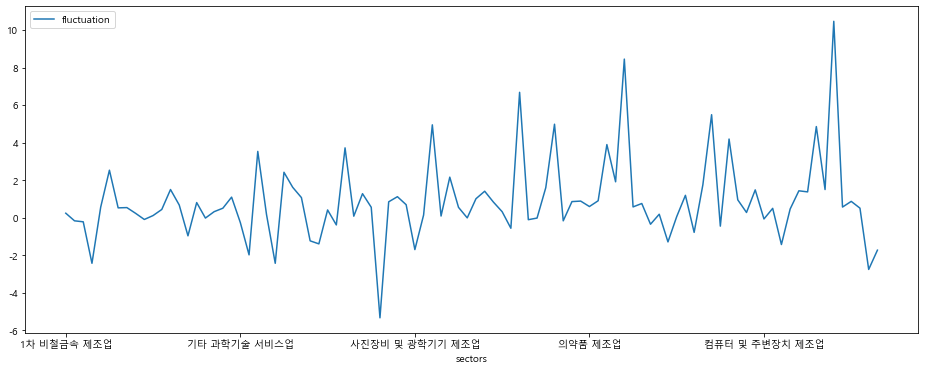

In [71]:
pivot.plot(figsize= (16, 6))

<AxesSubplot:title={'center':'데이터 분석'}, xlabel='sectors'>

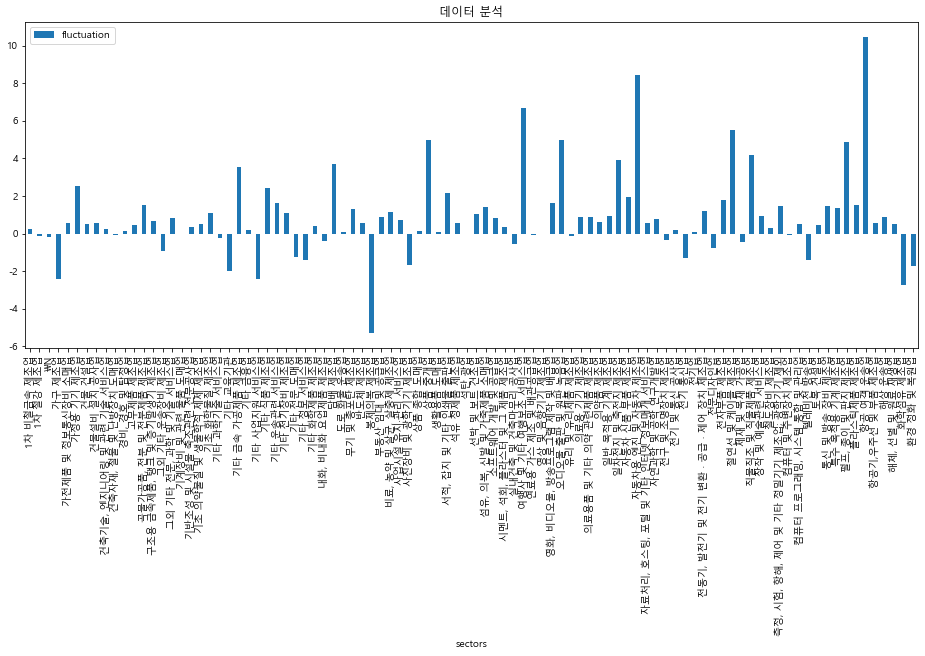

In [79]:
pivot.plot(kind='bar', figsize= (16, 6), title="데이터 분석")

<AxesSubplot:ylabel='Frequency'>

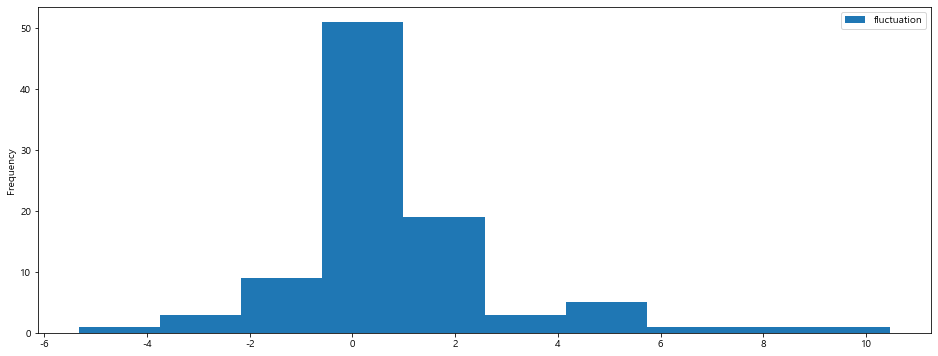

In [78]:
pivot.plot(kind='hist', figsize= (16, 6))

In [72]:
help(pivot.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

<AxesSubplot:xlabel='sectors'>

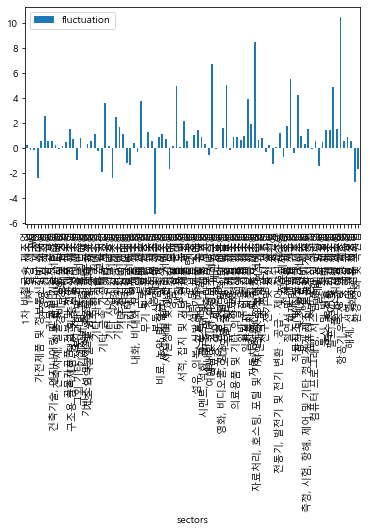

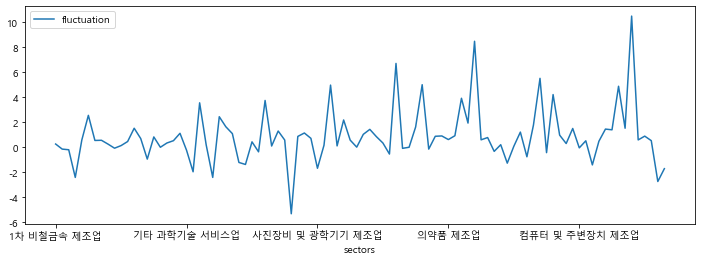

In [66]:
## 크기가 안늘어나요 ..

from matplotlib import font_manager, rc
rc("font", family="Malgun Gothic")

# 아래의 코드 한 줄을 추가로 입력하면 오류가 해결된다.
# plt.rcParams["axes.unicode_minus"]로 대체 가능
# rc('axes', unicode_minus=False)
%matplotlib inline

pivot.plot(kind = "bar")

## 왜안되지 ..
pivot.plot(figsize= (12, 4))